Here are some recommended packages, not all are required and depends on your solution.

In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

## Questions

You are a consultant for a company that sells widgets.  They have historical data on their sales on their investments in advertising in various media outlets, including TV, radio, and newspapers.  On the basis of this data, how should they be spending their advertising money in the future?

Your analysis should answer the following questions:

Is there a relationship between ads and sales?

How strong is that relationship?

Which ad types contribute to sales?

What is the effect of each ad type of sales?

Given ad spending in a particular market, can sales be predicted?

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


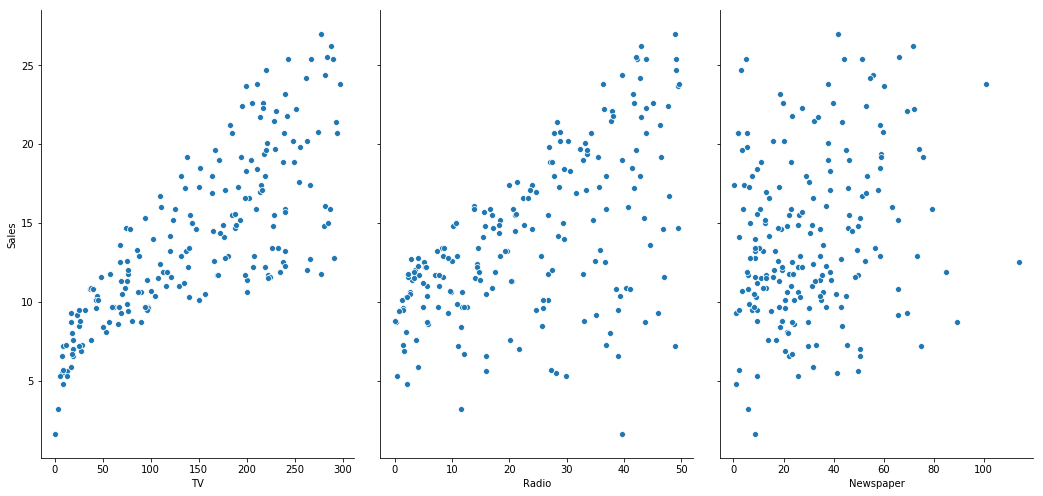

In [2]:
# read data into a DataFrame, this is money spent on different medias
data = pd.read_csv('https://raw.githubusercontent.com/lneisenman/isl/master/data/Advertising.csv', index_col=0)
print(data.head())
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)

In the lecture, we covered how to perform a linear regression model.  We did not however explore how "good" this model is.  The task below will have you identifying ways to evaluate a linear regression model.

Machine learning focuses on what the model predicts. If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the Statsmodels Python package. Take some time to look at this [package](https://www.statsmodels.org/stable/regression.html) and also an [example of evaluating a linear regression](https://www.statsmodels.org/stable/examples/notebooks/generated/gls.html).

Similar to Scikit-learn, one can calculate the intercept and coefficient for a linear fit for a set of data.  

In [43]:
TV_result = smf.ols(formula='TV ~ Sales', data=data).fit()
Radio_result = smf.ols(formula='Radio ~ Sales', data=data).fit()
News_result = smf.ols(formula='Newspaper ~ Sales', data=data).fit()

print(TV_result.params)
print(Radio_result.params)
print(News_result.params)

Intercept   -33.450228
Sales        12.871651
dtype: float64
Intercept    0.271298
Sales        1.639701
dtype: float64
Intercept    17.191090
Sales         0.952962
dtype: float64


A confidence interval can be used to describe a linear model.  How would you calculate the confidence interval of this model and what does this confidence interval mean?

In [44]:
print(TV_result.conf_int(alpha=0.05))
print(Radio_result.conf_int(alpha=0.05))
print(News_result.conf_int(alpha=0.05))

                   0          1
Intercept -54.939198 -11.961258
Sales      11.434949  14.308354
                  0         1
Intercept -4.603750  5.146346
Sales      1.313766  1.965635
                  0          1
Intercept  8.672356  25.709824
Sales      0.383419   1.522505


Other metrics that are used to describe the appropriateness of a model is a p-value.  How would you calculate the p-value and r-squared values of the model?  What do these values mean?

In [47]:
print(TV_result.summary())
print(Radio_result.summary())
print(News_result.summary())

                            OLS Regression Results                            
Dep. Variable:                     TV   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           1.47e-42
Time:                        10:53:26   Log-Likelihood:                -1079.2
No. Observations:                 200   AIC:                             2162.
Df Residuals:                     198   BIC:                             2169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.4502     10.897     -3.070      0.0